In [1]:
from scipy.signal import savgol_filter
from scipy.io import wavfile
from skimage import util
from bisect import bisect
import matplotlib.pyplot as plt
import numpy as np

In [2]:
rate, channels = wavfile.read('beep6.wav')
signal = np.mean(channels, axis=1) / 32767
length = len(signal)
duration = length / rate

print('Sample rate (Hz):', rate)
print('Length (samples):', length)
print('Length (seconds):', round(duration, 3))

Sample rate (Hz): 44100
Length (samples): 14336
Length (seconds): 0.325


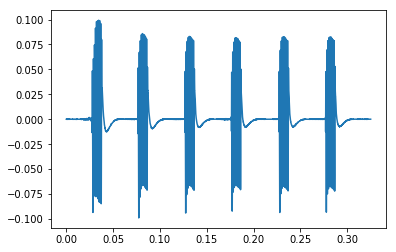

In [3]:
plt.plot(np.arange(length) / rate, signal)

In [4]:
winsize = 1024
winstep = 100

windows = util.view_as_windows(signal, window_shape=(winsize,), step=winstep)
windows = windows * np.hanning(winsize)
windows = windows.T

print('Sliced original signal to',  windows.shape[1], 'windows')
print('Window width (samples):', winsize)
print('Window step (samples):', winstep)

Sliced original signal to 134 windows
Window width (samples): 1024
Window step (samples): 100


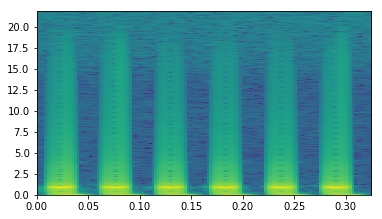

In [5]:
spectrum = np.abs(np.fft.fft(windows, axis=0))[:winsize // 2]
freqs = np.fft.fftfreq(winsize)[:winsize // 2] * rate

s = np.log10(spectrum / np.max(spectrum))
plt.imshow(s, origin='lower', extent=(0, duration, 0, freqs[-1] / 1000), aspect=duration / 40)

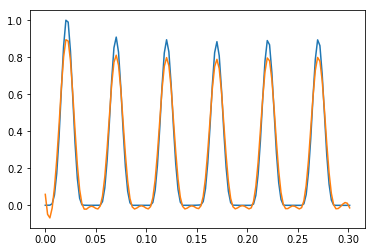

In [6]:
# TODO: RESEARCH

freq = 900
threshold = 0.5
smoothwindow = 10 + 1
polyorder = 3

index = bisect(freqs, freq)
oldvolume = spectrum[index, :] / np.max(spectrum)
volume = savgol_filter(oldvolume, smoothwindow, polyorder)

plt.plot(np.arange(len(volume)) * winstep / rate, oldvolume)
plt.plot(np.arange(len(volume)) * winstep / rate, volume)

In [7]:
filtered = volume > threshold
rshifted = np.roll(filtered, 1)
starts = (filtered & ~rshifted).nonzero()
ends = (~filtered & rshifted).nonzero()
beeps = np.dstack([starts, ends])
beeps = np.multiply(beeps, winstep / rate)
beeps = np.round(beeps, 3)[0].tolist()

print(beeps)

[[0.016, 0.029], [0.066, 0.077], [0.116, 0.127], [0.166, 0.177], [0.215, 0.229], [0.265, 0.279]]
